Department of Physics, University of Pisa (AA 2022-2023)

### Multimessenger Physics Laboratory tutorial series



## Exercise 01 - Correlating source catalogs
#### (M. Razzano, Feb 21, 2023)

In this exercise you will have to read and manipulate source catalogs using Pandas and find correlations among sources of different classes. 

We will use two catalogs of sources

* **The Fourth Catalog of Fermi Sources (4FGL)**, a catalog of gamma-ray point sources collected during 8 years of observations of the Large Area Telescope onboard the Fermi mission. The reference for 4FGL is [S. Abdollahi et al 2020 ApJS 247 33](https://iopscience.iop.org/article/10.3847/1538-4365/ab6bcb)
* **The ROSAT all-sky survey bright source catalogue (1RX)**, a catalog of X-ray point sources collected by the Roentgen satellite. The reference for 1RX is [Voges et al. 1990, A&A, 349,389](http://adsabs.harvard.edu/full/1999A%26A...349..389V)

**Please note** The references here are for completeness, you do not need to read the full (and long) papers to perform the exercises. However, if you want to do it, you are certainly welcome!

### Basic Setup
As usual, in the cell below you should import the modules that you think you will require...

In [1]:
#import...

import numpy as np
import os
import pandas as pd
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from astropy.io import fits

In [2]:
#also, you might want to define the directories you will use in this exercise

#Define the various directories
work_dir = os.getcwd()

main_dir = os.path.dirname(work_dir)

data_dir = os.path.join(main_dir,"data")

results_dir = os.path.join(main_dir,"results")

print("Project main dir is %s" % main_dir)
print("Data dir is %s" %data_dir)
print("Work dir is %s" %work_dir)
print("Results dir is %s" %results_dir)

Project main dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01
Data dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/data
Work dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/exercises
Results dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/results


### Open and explore the 4FGL catalog

You can find the 4FGL catalog in the FITS file *fermi_lat_4fgl_gll_psc_v22.fits* in the data directory.

Open it using astropy and have a look at it (what are the columns, etc) and finally convert to a Pandas dataframe, and do some basic data exploration and plotting

In [3]:
#open the file using astropy

input_filename = os.path.join(data_dir,"fermi_lat_4fgl_gll_psc_v22.fits")
fits_info = fits.open(input_filename)

fits_info.info()

Filename: /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/data/fermi_lat_4fgl_gll_psc_v22.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    482   5065R x 84C   [18A, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 8E, 16E, 8E, E, E, E, E, E, E, D, E, 48E, 96E, 48E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    119   1748R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     75   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU

In [4]:
data, header = fits.getdata(input_filename, ext=1,header=True) # Leggo HDU 1
print(f'There are %d columns' % len(data.columns))
data.columns # leggo gli header

There are 84 columns


ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'Flux1000'; format = 'E'; uni

In [5]:
from astropy.table import Table

gamma_data = Table(data)
print("Data contains %d gamma sources" % len(gamma_data))


Data contains 5065 gamma sources


In [6]:
# How many columns you can see? Remove every column except from the name, coordinates, and the Conf 95 SemiMajor 
# (the uncertainty in position), and source class (CLASS1). 
# Make sure that the CLASS1 is well formatted, i.e. uppercase and with no blank spaces

print(f" There are %d columns" % len(gamma_data.columns)) # numero di colonne 

columns_to_keep = ['Source_Name', 'Conf_95_SemiMajor', 'GLON', 'GLAT', 'CLASS1'] # colonne che voglio tenere
columns_to_remove = [col for col in gamma_data.colnames if col not in columns_to_keep] # elimino quelle che non mi interessano
gamma_data.remove_columns(columns_to_remove)

gamma_data.columns # ora gamma_data ha solo le colonne che voglio, che sono 5



for ci in gamma_data.colnames:
    if len(gamma_data[ci].shape)>1:  # tabella dentro una tabella
        gamma_data.remove_column(ci)
        print("Removing %s " % ci)
    else:
        print("Not removing")
            
 # Non ho colonne con shape > 1       

 There are 84 columns
Not removing
Not removing
Not removing
Not removing
Not removing


In [7]:
#now, convert to a Pandas 

gamma_df = gamma_data.to_pandas()

print("There are %d sources" % len(gamma_df)) # numero di sorgenti

gamma_df["CLASS1"] = gamma_df["CLASS1"].str.upper() # metto tutto in caps
gamma_class = np.unique(gamma_df["CLASS1"]) # find the unique elements on an array

print("There are %d classes" % len(gamma_class), gamma_class) # numero di classi

gamma_df



There are 5065 sources
There are 23 classes ['     ' 'AGN  ' 'BCU  ' 'BIN  ' 'BLL  ' 'CSS  ' 'FSRQ ' 'GAL  ' 'GLC  '
 'HMB  ' 'LMB  ' 'NLSY1' 'NOV  ' 'PSR  ' 'PWN  ' 'RDG  ' 'SBG  ' 'SEY  '
 'SFR  ' 'SNR  ' 'SPP  ' 'SSRQ ' 'UNK  ']


,Source_Name,GLON,GLAT,Conf_95_SemiMajor,CLASS1
0,4FGL J0000.3-7355,307.708984,-42.729538,0.0525,
1,4FGL J0001.2+4741,114.250198,-14.338059,0.0598,BCU
2,4FGL J0001.2-0747,89.032722,-67.305008,0.0299,BLL
3,4FGL J0001.5+2113,107.649353,-40.167652,0.0422,FSRQ
4,4FGL J0001.6-4156,334.226349,-72.028549,0.0692,BCU
...,...,...,...,...,...
5060,4FGL J2359.0-3038,12.809109,-78.024170,0.0228,BLL
5061,4FGL J2359.1+1719,105.517410,-43.772465,0.0542,BCU
5062,4FGL J2359.3-2049,58.090145,-76.542862,0.0399,BLL
5063,4FGL J2359.3+1444,104.564713,-46.256252,0.2217,


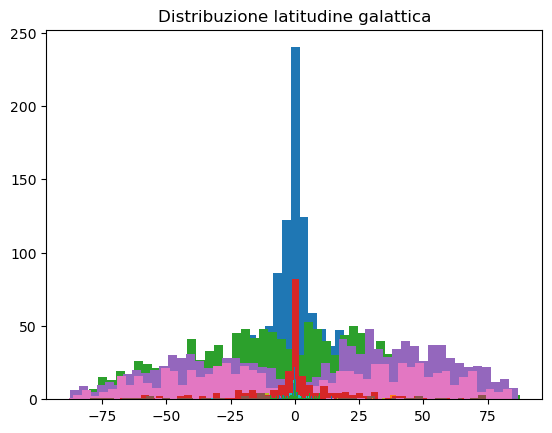

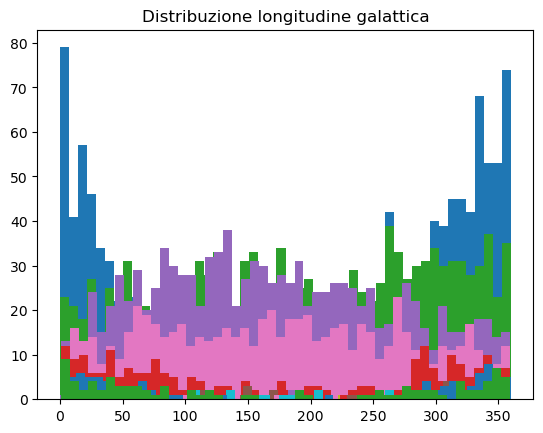

In [8]:
#Make some plots that shows the distribution in l,b, 
#using histograms of different colors for each source class in CLASS1

GLAT_g = gamma_df["GLAT"]
GLON_g = gamma_df["GLON"]

fig = plt.figure()

for classe in gamma_class:
    a = GLAT_g[gamma_df["CLASS1"]== classe] # separo le varie classi
    plt.hist(a, bins=50)
    plt.title('Distribuzione latitudine galattica')

fig = plt.figure()

for classe in gamma_class:
    a = GLON_g[gamma_df["CLASS1"]== classe] # separo le varie classi
    plt.hist(a, bins=50)
    plt.title('Distribuzione longitudine galattica')

### Open and explore the 1RX catalog

You can find the 1RX catalog in the csv file *1RX_voges1999.csv* in the data directory. Please note that in this file you will have to use "read_csv" function of pandas, but you will have to remember 2 notions:

* you need to skip a certain amount of rows (using the parameter skiprows in read_csv)
* data are separated not by commas, but by semicolumns, so you will have to change the delimiter ("sep" parameter in "read_csv")

For more details, please refer to the [help of this function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

Open it using astropy and have a look at it (what are the columns, etc)

In [9]:
#open with pandas function read_csv
# you will have to skip the first row, in order to explore the file, you
# can open a terminal and use the bash command "less" to see how many rows you have to skip

xsource_name = "1RX_voges1999.csv" # do` un nome al mio file
xsource_file = os.path.join(data_dir,xsource_name)
xsource_df = pd.read_csv(xsource_file, skiprows=38, sep=';') # crea un data frame pandas dal csv

xsource_df

,1RXS,RAJ2000,DEJ2000,Count
0,J000000.0-392902,0.00000,-39.48403,0.1310
1,J000007.0+081653,0.02917,8.28153,0.1870
2,J000010.0-633543,0.04167,-63.59528,0.1900
3,J000011.9+052318,0.04958,5.38833,0.2640
4,J000012.6+014621,0.05250,1.77250,0.0811
...,...,...,...,...
18801,J235930.9-401541,359.87875,-40.26139,0.1280
18802,J235940.9-314342,359.92041,-31.72847,0.0584
18803,J235941.2+830719,359.92166,83.12195,0.0664
18804,J235944.7+220014,359.93625,22.00389,0.0525


There are 4 columns


Text(0.5, 1.0, 'Distribuzione longitudine galattica')

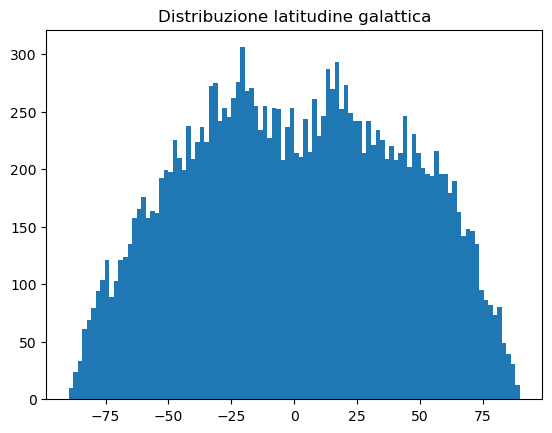

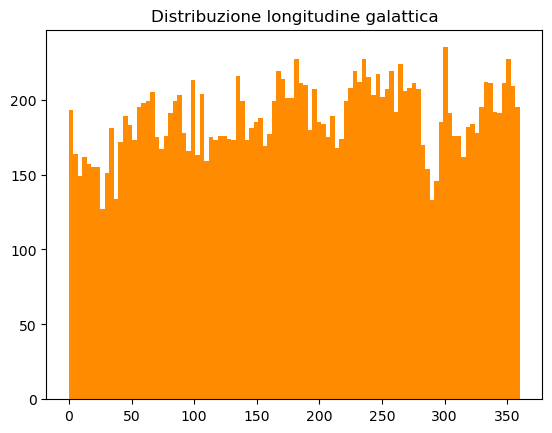

In [10]:
#how many colums are there? can you plot the distribution in l and b? 
#The coordinates here are RA,DEC, so you should use astropy to convert to Galactic ones (l,b)

print("There are %d columns" % len(xsource_df.columns))

ra = xsource_df["RAJ2000"]
dec = xsource_df["DEJ2000"]

c_icrs = SkyCoord(ra*u.degree, dec*u.degree, frame='icrs')
c_gal = c_icrs.galactic
GLAT_x = c_gal.b.deg # latitudine galattica in gradi
GLON_x = c_gal.l.deg # Longitudine galattica in gradi

fig = plt.figure()
plt.hist(GLAT_x, bins=100)
plt.title('Distribuzione latitudine galattica')

fig = plt.figure()
plt.hist(GLON_x, bins=100, color='darkorange')
plt.title('Distribuzione longitudine galattica')

### Find the spatial correlations

Now you can go through the 4FGL sources and check which one have spatial correlation with 1RX sources. You can use the column Conf 95 SemiMajor as uncertainty in the position of the gamma-ray source, and build some statistics

In [19]:
#for instance, how many 4FGL sources are spatially correlated with 1RX?

# calcolo la distanza 
# voglio che la distanza sia al massimo err
import math
def spacialcorr(GLAT_g, GLON_g, GLAT_x, GLON_x):
    correlations = []
    err = gamma_df["Conf_95_SemiMajor"]

    for i in range(len(GLAT_g)):
        print("ciao")
        for j in range(len(GLAT_x)):
            
            dist= np.sqrt((GLAT_g[i]-GLAT_x[j])**2 + (GLON_g[i]-GLON_x[j])**2)
            if dist < err[i]:
               correlations.append((GLAT_g[i], GLON_g[i], GLAT_x[j], GLON_x[j]))

    return correlations
           
           
spacialcorr(GLAT_g, GLON_g, GLAT_x, GLON_x)       

ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao


[(-40.167652, 107.64935, -40.15982310476208, 107.65854227520552),
 (-48.963467, 310.08493, -48.987316613309275, 310.0744805021044),
 (4.939485, 118.20349, 4.998428945771056, 118.21391405312983),
 (-71.76617, 327.77505, -71.78318551668444, 327.78608827492326),
 (-21.451033, 115.2578, -21.446572674989966, 115.24542261652383),
 (-65.69481, 317.45294, -65.68718053394257, 317.44393139988415),
 (-52.85195, 107.61855, -52.78496913829286, 107.59398832514064),
 (-52.85195, 107.61855, -52.863666658862556, 107.64063477775981),
 (-4.4981065, 118.074745, -4.490802604215499, 118.06997200852338),
 (-26.677507, 114.71823, -26.688589110429714, 114.75609313977633),
 (-6.6570644, 117.8881, -6.660284427096688, 117.89619714337576),
 (-66.667816, 101.209854, -66.65104197386978, 101.23940150101234),
 (-32.54827, 114.44117, -32.5360405292788, 114.4441651956042),
 (-35.16209, 304.31436, -35.16276786686695, 304.30849294446057),
 (-64.835396, 313.70114, -64.83338058355375, 313.7025944253757),
 (-61.85817, 107.20

In [17]:
# definisco una funzione per la distanza

def distanza(GLAT_g, GLON_g, GLAT_x, GLON_x):
    LAT = GLAT_g - GLAT_x
    LON = GLON_g - GLON_x
    return np.sqrt(LAT**2 + LON**2)

err = gamma_df["Conf_95_SemiMajor"]
corr=[]

for i in range(len(GLAT_g)):
    l1 = GLON_g.iloc[i]
    b1 = GLAT_g.iloc[i]
    sigma = err.iloc[i]
    mask = (distanza(b1, l1, GLAT_x, GLON_x)<sigma) # mi ritorna un array booleano degli indici che soddisfano la condizione
    if len(xsource_df[mask]["1RXS"])>0: # se c'è una correlazione
        corr.append(xsource_df[mask]["1RXS"])        
        
print("Ci sono %d sorgenti correlate" % len(corr))        

/tmp/ipykernel_1580/3655732137.py:15: RuntimeWarning: invalid value encountered in less
  mask = (distanza(b1, l1, GLAT_x, GLON_x)<sigma) # mi ritorna un array booleano degli indici che soddisfano la condizione


Ci sono 729 sorgenti correlate


In [ ]:
# For each CLASS1 source class in 4FGL, , find how many of these gamma-ray sources are spatially associated 
# with 1RX. 

In [ ]:
# Now, select 3 source classes you prefer. Dor each of these source classes, you can plot a distribution of l and b 

In [ ]:
# For each of these source class you have selected, how is the distribution of the angular distances between 
# the gamma-ray and X-ray source?

### Final steps
Congratulations! Don't forget to save to Github (using git commit + git push)